In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
con = mysql.connector.connect(
host = 'localhost' ,
port = 3306 ,
user = 'root' ,
password = 'Drashti@123' , 
database = 'studentm')

In [4]:
df = pd.read_sql_query('select * from marks', con)

df1 = df

df

,name,gender,dob,math,physics,chemistry,english,biology,economics,history,civics
0,John,M,1988,55,45,56,87,21,52,89,65
1,Suresh,M,1987,75,96,78,64,90,61,58,2
2,Ramesh,M,1989,25,54,89,76,95,87,56,74
3,Jessica,F,1990,78,96,86,63,54,89,75,45
4,Jennifer,F,1989,58,96,78,46,96,77,83,53
5,Annu,F,1988,45,87,52,89,55,89,87,52
6,pooja,F,1987,55,64,61,58,75,58,64,61
7,Ritesh,M,1989,54,76,87,56,25,56,76,87
8,Farha,F,1990,55,63,89,75,78,75,63,89
9,Mukesh,M,1989,96,46,77,83,58,83,46,77


In [5]:
df.columns

Index(['name', 'gender', 'dob', 'math', 'physics', 'chemistry', 'english',
       'biology', 'economics', 'history', 'civics'],
      dtype='object')

In [6]:
df.dtypes

# All are integers except Name and Gender

name         object
gender       object
dob           int64
math          int64
physics       int64
chemistry     int64
english       int64
biology       int64
economics     int64
history       int64
civics        int64
dtype: object

In [7]:
df.shape

# 10 => Rows
# 11 => Column

(10, 11)

In [8]:
df.info()

# All fileds are not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       10 non-null     object
 1   gender     10 non-null     object
 2   dob        10 non-null     int64 
 3   math       10 non-null     int64 
 4   physics    10 non-null     int64 
 5   chemistry  10 non-null     int64 
 6   english    10 non-null     int64 
 7   biology    10 non-null     int64 
 8   economics  10 non-null     int64 
 9   history    10 non-null     int64 
 10  civics     10 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 1008.0+ bytes


# Summary Statistics

In [9]:
df.describe()

,dob,math,physics,chemistry,english,biology,economics,history,civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,1988.600000,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,1.074968,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,1987.000000,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,1988.000000,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,1989.000000,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,1989.000000,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,1990.000000,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


Observaions:
1. Mean is less than Median (50%) ===> chemistry , biology , economics and civics ==> slightly Left Skewed Data
2. Mean is same as Median (50%) ===> dob , history , physics and history ==> Normal Distribution
3. Large difference between 75 % and max ===> math, civics, biology  ===> Outliers Present

# Exploratory Data Analysis (EDA)

In [10]:
df.dob.unique()

array([1988, 1987, 1989, 1990], dtype=int64)

In [11]:
df.dob.value_counts()

1989    4
1990    2
1988    2
1987    2
Name: dob, dtype: int64

In [12]:
df.gender.value_counts()

F    5
M    5
Name: gender, dtype: int64

In [13]:
df.math.value_counts()

55    3
78    1
45    1
75    1
58    1
25    1
54    1
96    1
Name: math, dtype: int64

In [14]:
list = [ 'math', 'physics', 'chemistry', 'english','biology', 'economics', 'history', 'civics']

for i in range(len(list)):
    print(list[i], "minimun is ",df[list[i]].min())
    print(list[i], "maximum is ",df[list[i]].max())
    print(df[list[i]].value_counts(),"\n")
    
    
    

math minimun is  25
math maximum is  96
55    3
78    1
45    1
75    1
58    1
25    1
54    1
96    1
Name: math, dtype: int64 

physics minimun is  45
physics maximum is  96
96    3
63    1
46    1
45    1
76    1
64    1
87    1
54    1
Name: physics, dtype: int64 

chemistry minimun is  52
chemistry maximum is  89
78    2
89    2
77    1
61    1
56    1
87    1
86    1
52    1
Name: chemistry, dtype: int64 

english minimun is  46
english maximum is  89
63    1
46    1
76    1
75    1
58    1
89    1
56    1
87    1
83    1
64    1
Name: english, dtype: int64 

biology minimun is  21
biology maximum is  96
95    1
78    1
75    1
90    1
25    1
55    1
54    1
21    1
58    1
96    1
Name: biology, dtype: int64 

economics minimun is  52
economics maximum is  89
89    2
77    1
61    1
75    1
58    1
56    1
87    1
52    1
83    1
Name: economics, dtype: int64 

history minimun is  46
history maximum is  89
63    1
46    1
76    1
75    1
58    1
89    1
56    1
87    1
83    1

Observations:
1. Range is greatest for math, civics and biology
2. Range is least for chemistry and economics
3. Mode for math => 55 , physics => 96 and economics => 89

# Data Visualization

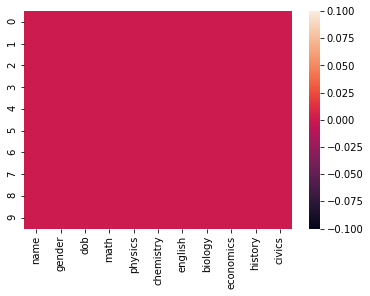

In [15]:
# Checking for Null values

sns.heatmap(df.isnull())

No null values present

# Check Correlation

In [16]:
dfcor = df.corr()

dfcor

,dob,math,physics,chemistry,english,biology,economics,history,civics
dob,1.000000,0.060550,-0.019010,0.665930,-0.022885,-0.058193,0.535566,-0.022885,0.542441
math,0.060550,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
physics,-0.019010,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
chemistry,0.665930,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
english,-0.022885,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
biology,-0.058193,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
economics,0.535566,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
history,-0.022885,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
civics,0.542441,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


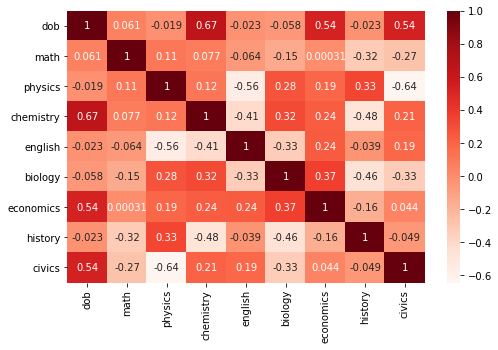

In [17]:
plt.figure(figsize = (8,5))
sns.heatmap(dfcor , cmap = 'Reds' , annot = True)

Observations:
1. Strong Positively correlated => 
                            physics with history
                            chemistry with biology
                            history with physics
                            
2. Strong Negatively correlated => 
                            math with history
                            physics with english and civics
                            chemistry with english and history
                            english with physics, chemistry and biology
                            history with math, chemistry and biology
                            civics with physics and biology


# Plotting Outliers

In [18]:
df1 = df.drop(["name" , "gender"] , axis = 1)

In [19]:
collist = df1.columns.values

collist
ncol = 10
nrows = 10

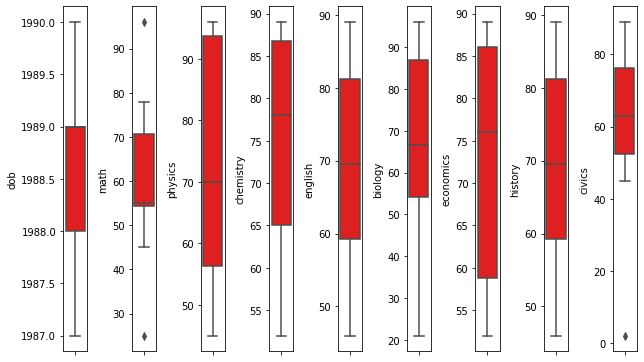

In [20]:
  
plt.figure(figsize = (ncol,5*ncol))
for i in range(0 , len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df[collist[i]] , color = 'red' , orient = 'v')
    plt.tight_layout()

Observations : 
Outliers are present in math and civics

# Check Distribution of Skewness 

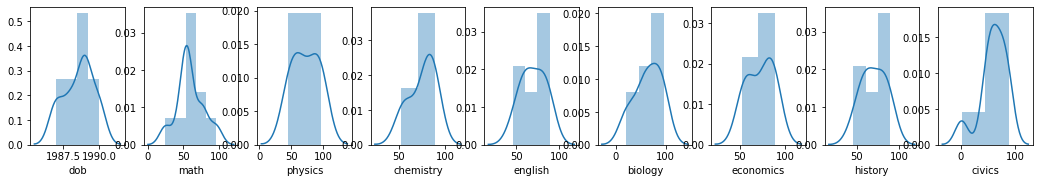

In [21]:
plt.figure(figsize = (20,30))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

Observations:
1. Normal Distribution = > math, physics, english and history
2. Left skewed => chemistry , biology , economics and civics


# Label Encoder

In [22]:
# Converting non numeric data to numeric for data analysis

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].astype(str))

# Univariant Analysis

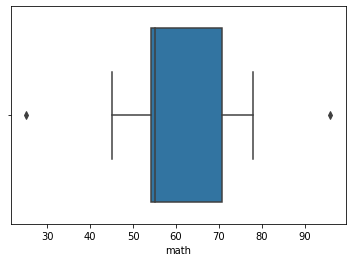

In [23]:
# Outliers are present

sns.boxplot(df["math"])

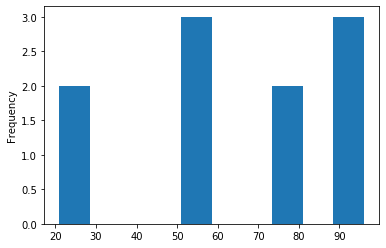

In [24]:
# Maximum students have got marks between 50-60 and 90 above

df["biology"].plot.hist()

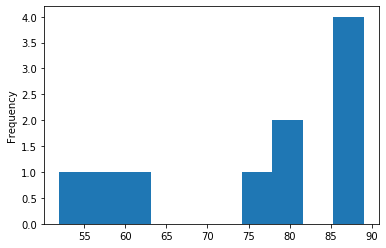

In [25]:
# Maximum students have got marks between 85-90

df["chemistry"].plot.hist()

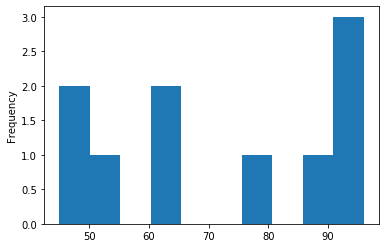

In [26]:
# Maximum students have got marks between 90-99

df["physics"].plot.hist()

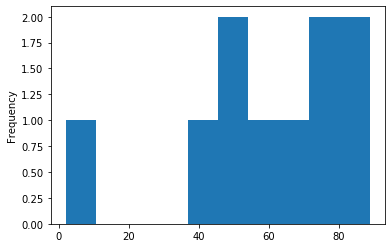

In [27]:
# Maximum students have got marks between 45-50 and 75-90

df["civics"].plot.hist()

# Bivarient Analysis

In [28]:
df.columns

Index(['name', 'gender', 'dob', 'math', 'physics', 'chemistry', 'english',
       'biology', 'economics', 'history', 'civics'],
      dtype='object')

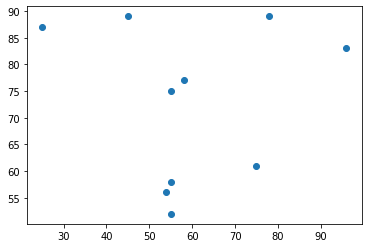

In [29]:
plt.scatter(df["math"],df["economics"])

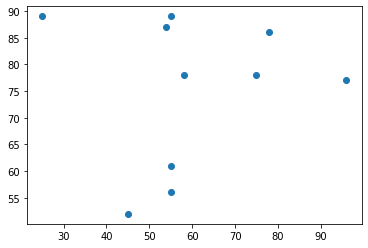

In [30]:
plt.scatter(df["math"],df["chemistry"])

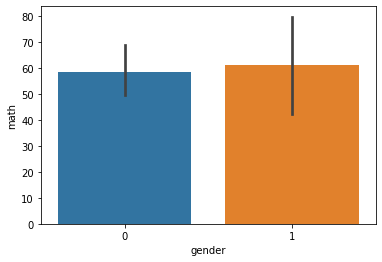

In [31]:
# Boys(1) have scored more thans girls(0)

sns.barplot(x=df['gender'], y=df['math'],data=df)
plt.show()

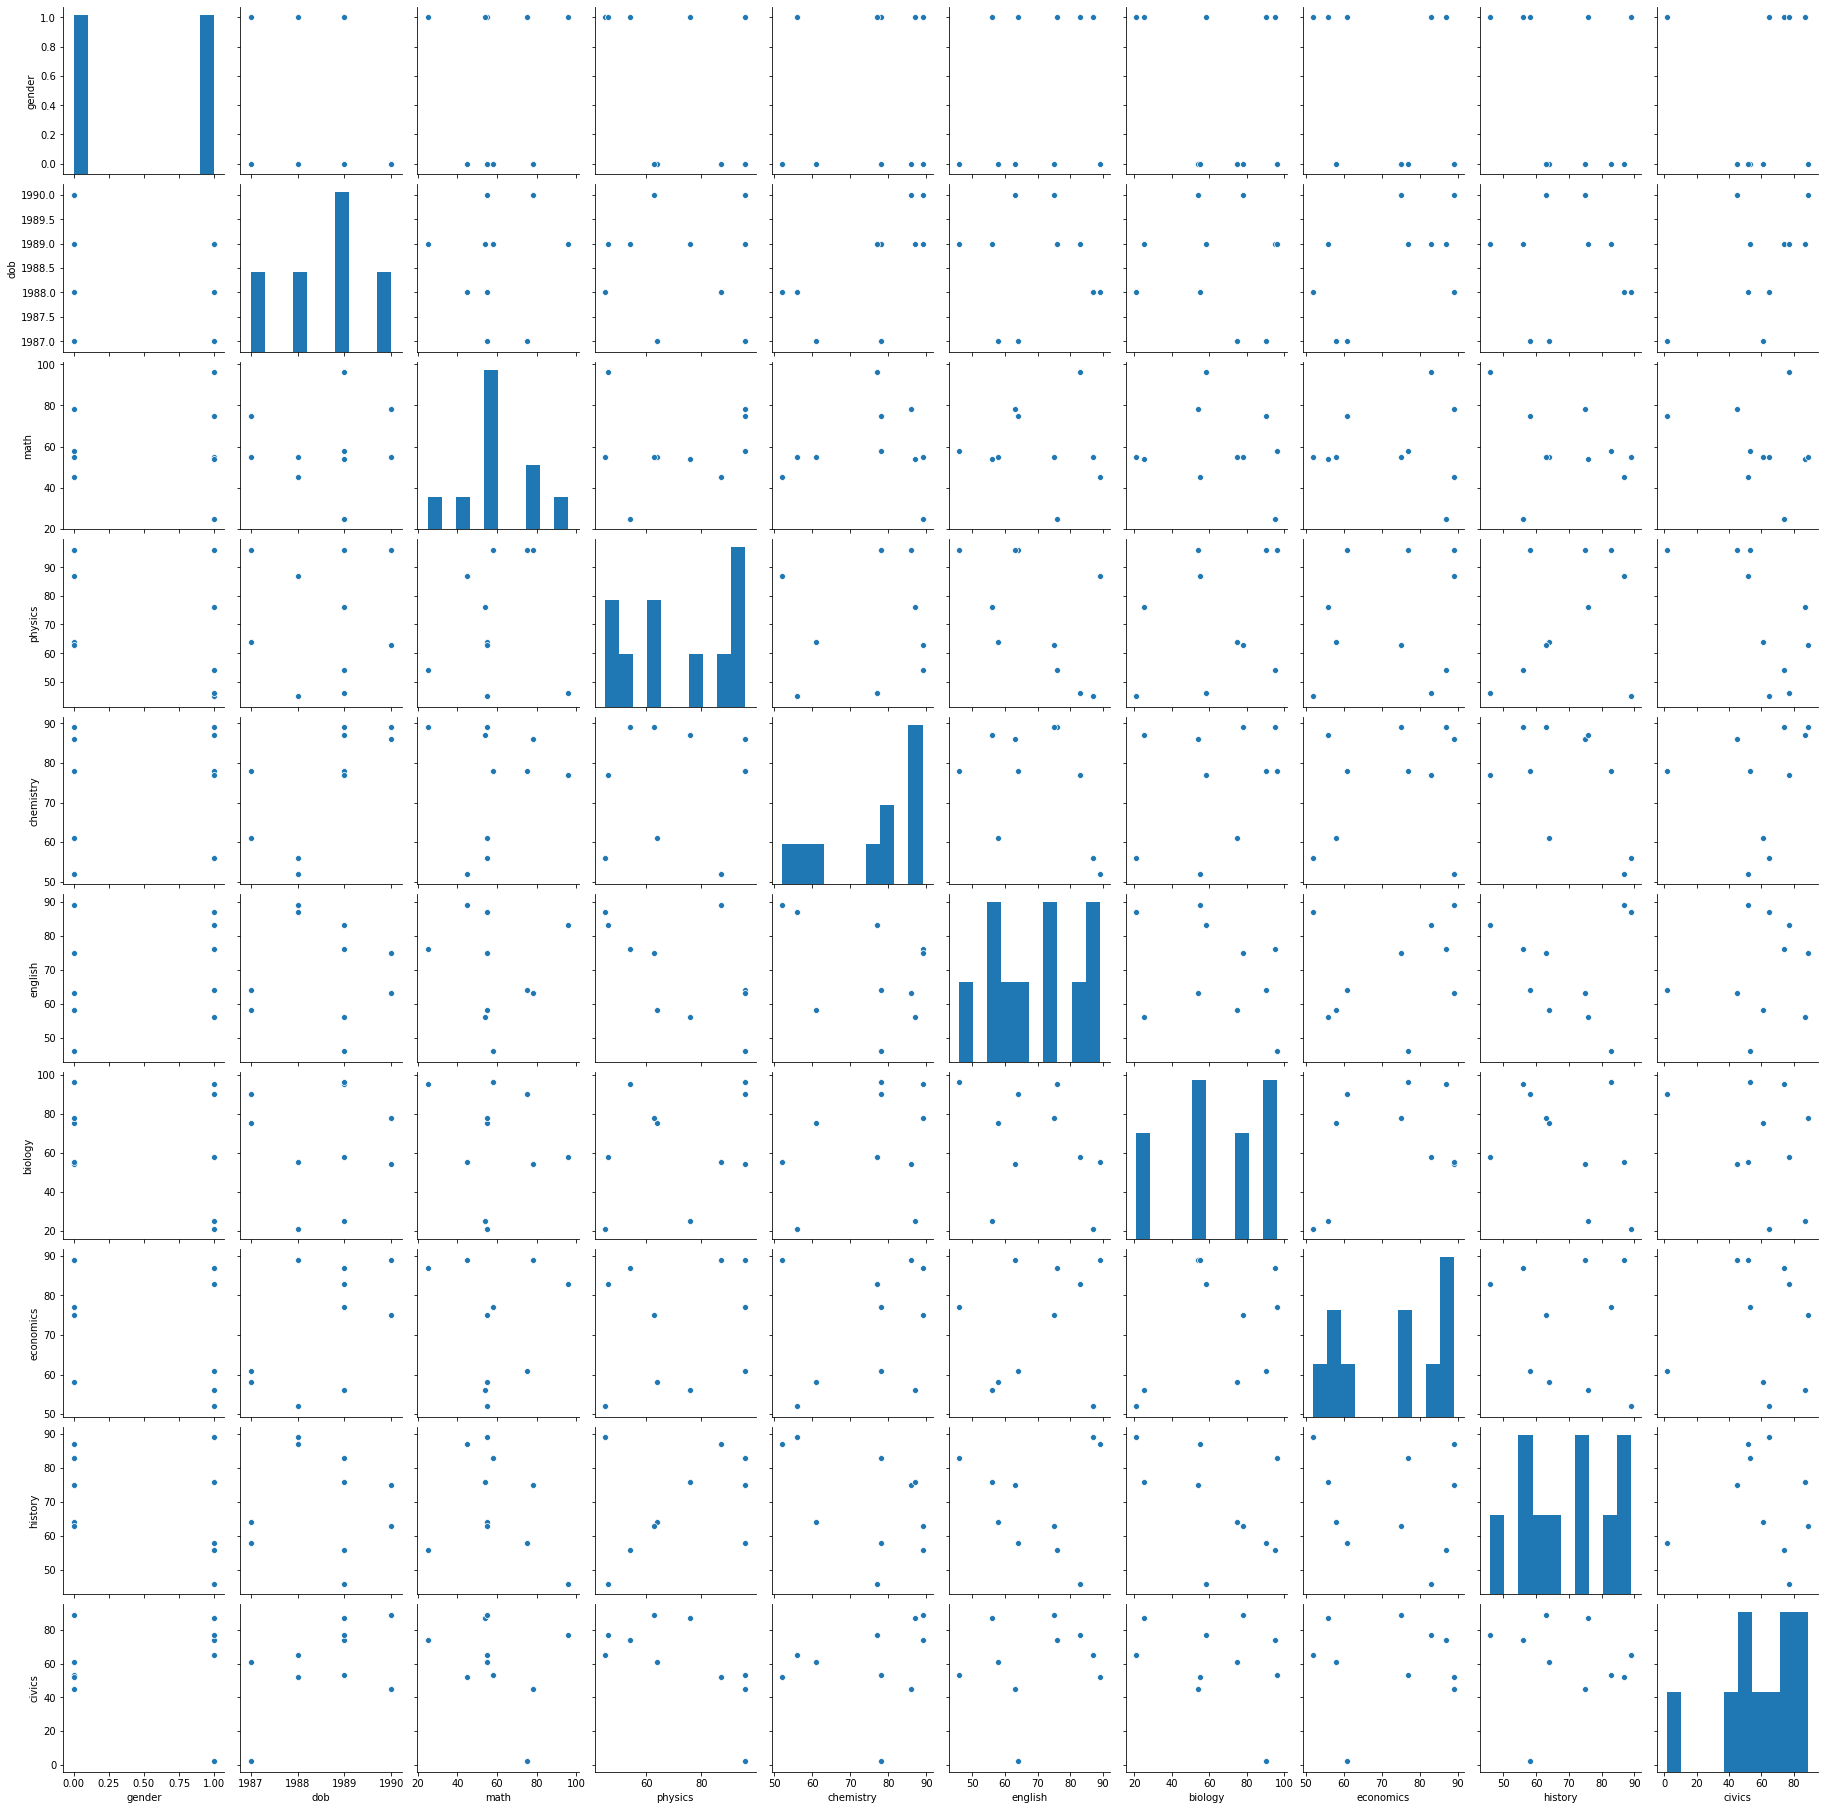

In [33]:
sns.pairplot(df)

Observations:

Strong Positively correlated =>

                     physics with history
                     chemistry with biology
                     history with physics
Strong Negatively correlated =>

                     math with history
                     physics with english and civics
                     chemistry with english and history
                     english with physics, chemistry and biology
                     history with math, chemistry and biology
                     civics with physics and biology

# Removing Outliers

In [34]:
df.dtypes

name         object
gender        int32
dob           int64
math          int64
physics       int64
chemistry     int64
english       int64
biology       int64
economics     int64
history       int64
civics        int64
dtype: object

In [35]:
# Removing outliers using zscore

from scipy.stats import zscore

df2 = df.drop(["name"] , axis = 1)

z = np.abs(zscore(df2))

df_new = df2[(z<3).all(axis = 1) ]

df_new

,gender,dob,math,physics,chemistry,english,biology,economics,history,civics
0,1,1988,55,45,56,87,21,52,89,65
1,1,1987,75,96,78,64,90,61,58,2
2,1,1989,25,54,89,76,95,87,56,74
3,0,1990,78,96,86,63,54,89,75,45
4,0,1989,58,96,78,46,96,77,83,53
5,0,1988,45,87,52,89,55,89,87,52
6,0,1987,55,64,61,58,75,58,64,61
7,1,1989,54,76,87,56,25,56,76,87
8,0,1990,55,63,89,75,78,75,63,89
9,1,1989,96,46,77,83,58,83,46,77


In [36]:
df.shape

(10, 11)

In [37]:
# Since dropped name column

df_new.shape

(10, 10)

No outliers have been removed.